In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

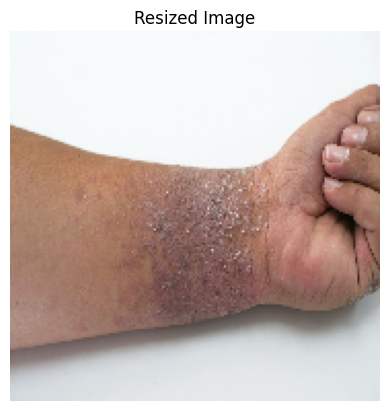

(1, 180, 180, 3)

In [5]:
import numpy as np

def load_and_preprocess_image(image_path, target_size=(180, 180)):
    """Loads an image, reshapes it, and visualizes it.

    Args:
        image_path: Path to the image file.
        target_size: Tuple (height, width) specifying the target size.

    Returns:
        A NumPy array representing the preprocessed image.
    """
    img = keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Visualize the image
    plt.imshow(keras.preprocessing.image.array_to_img(img_array[0]))
    plt.title("Resized Image")
    plt.axis('off')
    plt.show()

    return img_array

image_path = "/content/drive/MyDrive/Trained Models/Health-GettyImages-1291353447-511942bb113a4e72ba5480cc1742ef56.jpg"
resized_image = load_and_preprocess_image(image_path)

resized_image.shape


In [6]:
# Load the pre-trained model
loaded_model = keras.models.load_model("/content/drive/MyDrive/Trained Models/sih_2023.h5")
loaded_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 85, 85, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 42, 42, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 112896)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      28,901,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,992,140 (110.60 MB)

 Trainable params: 28,992,138 (110.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [8]:
# Extract feature maps
feature_extractor = keras.Model(
    inputs=loaded_model.inputs,
    outputs=[layer.output for layer in loaded_model.layers],
)
feature_maps = feature_extractor(resized_image)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['conv2d_input']
Received: inputs=Tensor(shape=(1, 180, 180, 3))
  warnings.warn(msg)


In [9]:
print(feature_maps)

[<tf.Tensor: shape=(1, 178, 178, 32), dtype=float32, numpy=
array([[[[0.24858549, 0.        , 0.        , ..., 0.        ,
          0.53305167, 0.13660957],
         [0.24911301, 0.        , 0.        , ..., 0.        ,
          0.53469473, 0.13935615],
         [0.24911301, 0.        , 0.        , ..., 0.        ,
          0.53469473, 0.13935615],
         ...,
         [0.24373771, 0.        , 0.        , ..., 0.        ,
          0.5230501 , 0.13682652],
         [0.24321018, 0.        , 0.        , ..., 0.        ,
          0.5214073 , 0.13408041],
         [0.24321018, 0.        , 0.        , ..., 0.        ,
          0.5214073 , 0.13408041]],

        [[0.24858549, 0.        , 0.        , ..., 0.        ,
          0.53305167, 0.13660957],
         [0.24911301, 0.        , 0.        , ..., 0.        ,
          0.53469473, 0.13935615],
         [0.24911301, 0.        , 0.        , ..., 0.        ,
          0.53469473, 0.13935615],
         ...,
         [0.24436457, 0.    

Feature Map from Layer 1 - Shape: (1, 178, 178, 32)


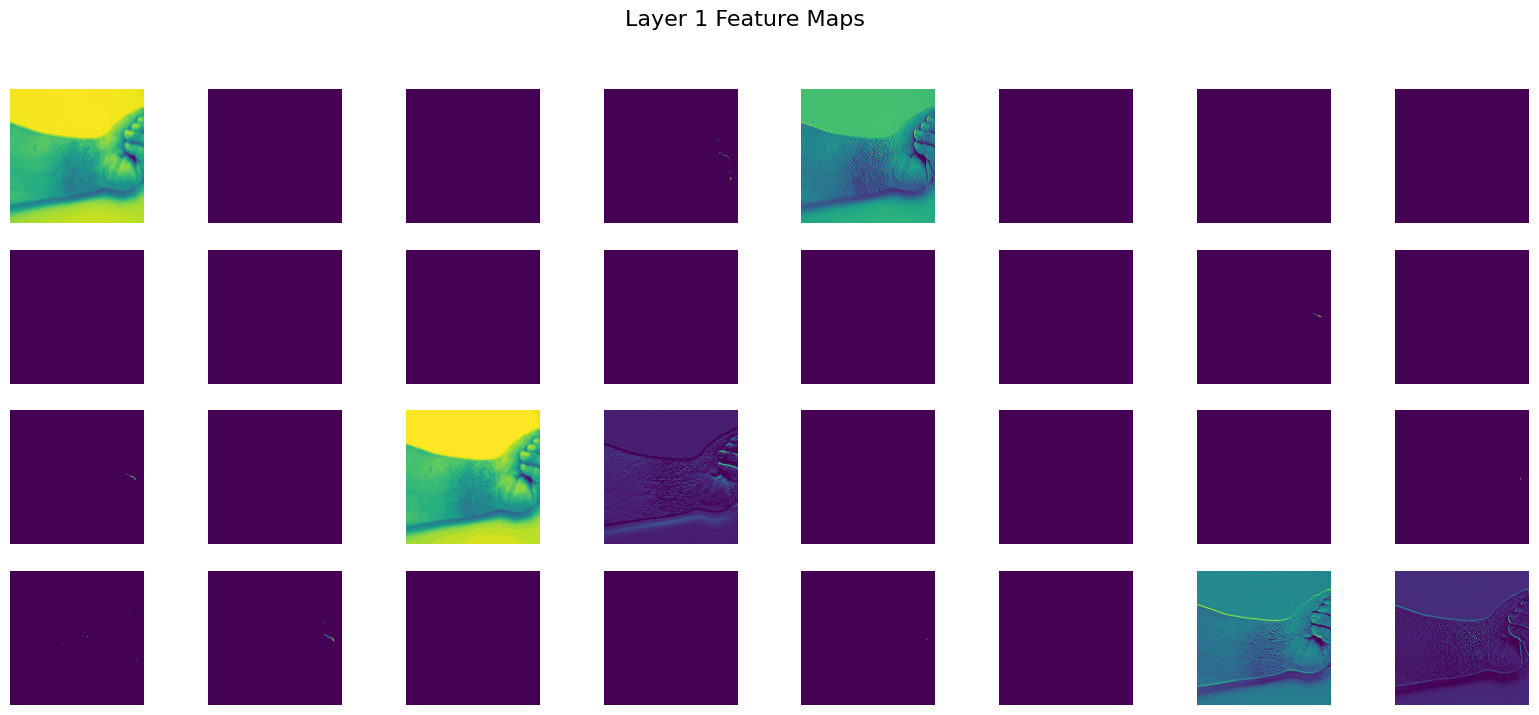

Feature Map from Layer 2 - Shape: (1, 89, 89, 32)


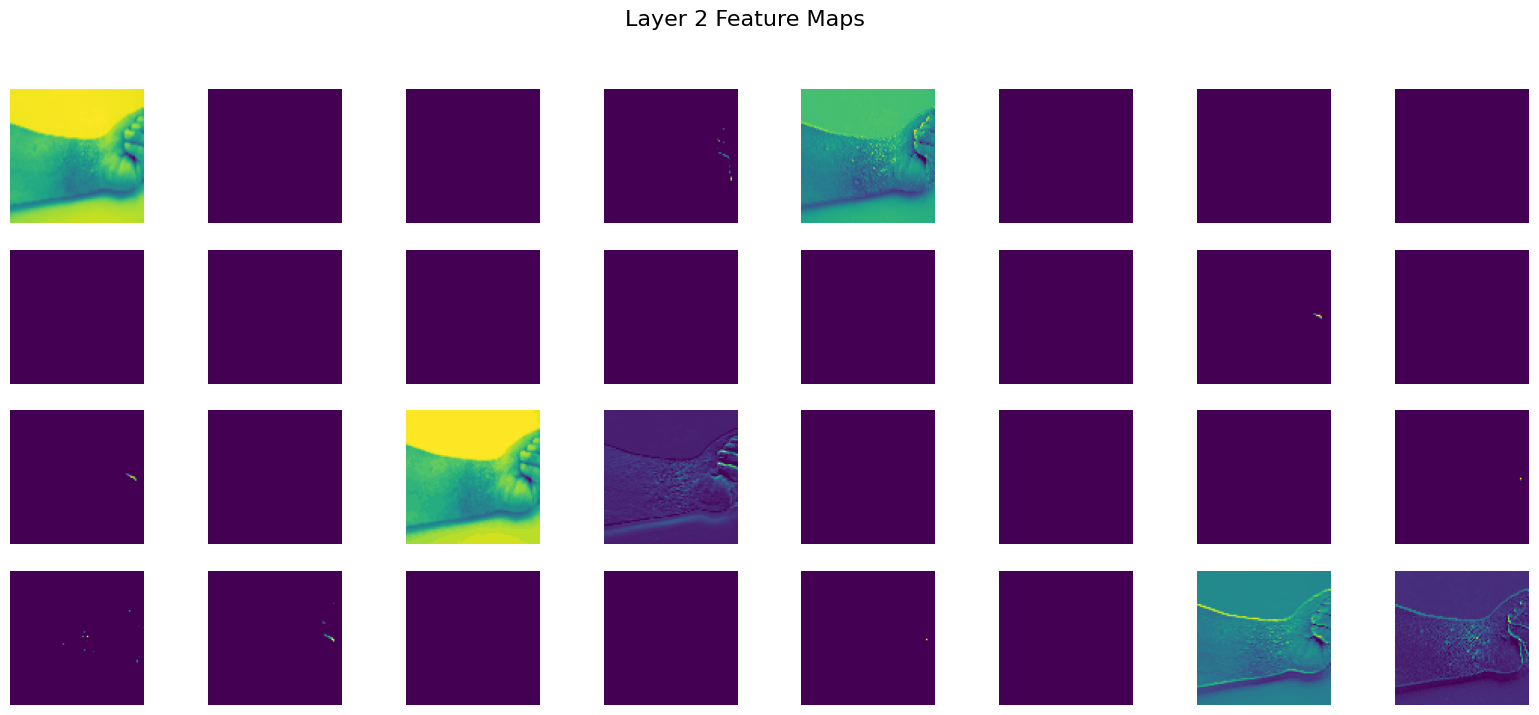

Feature Map from Layer 3 - Shape: (1, 87, 87, 64)


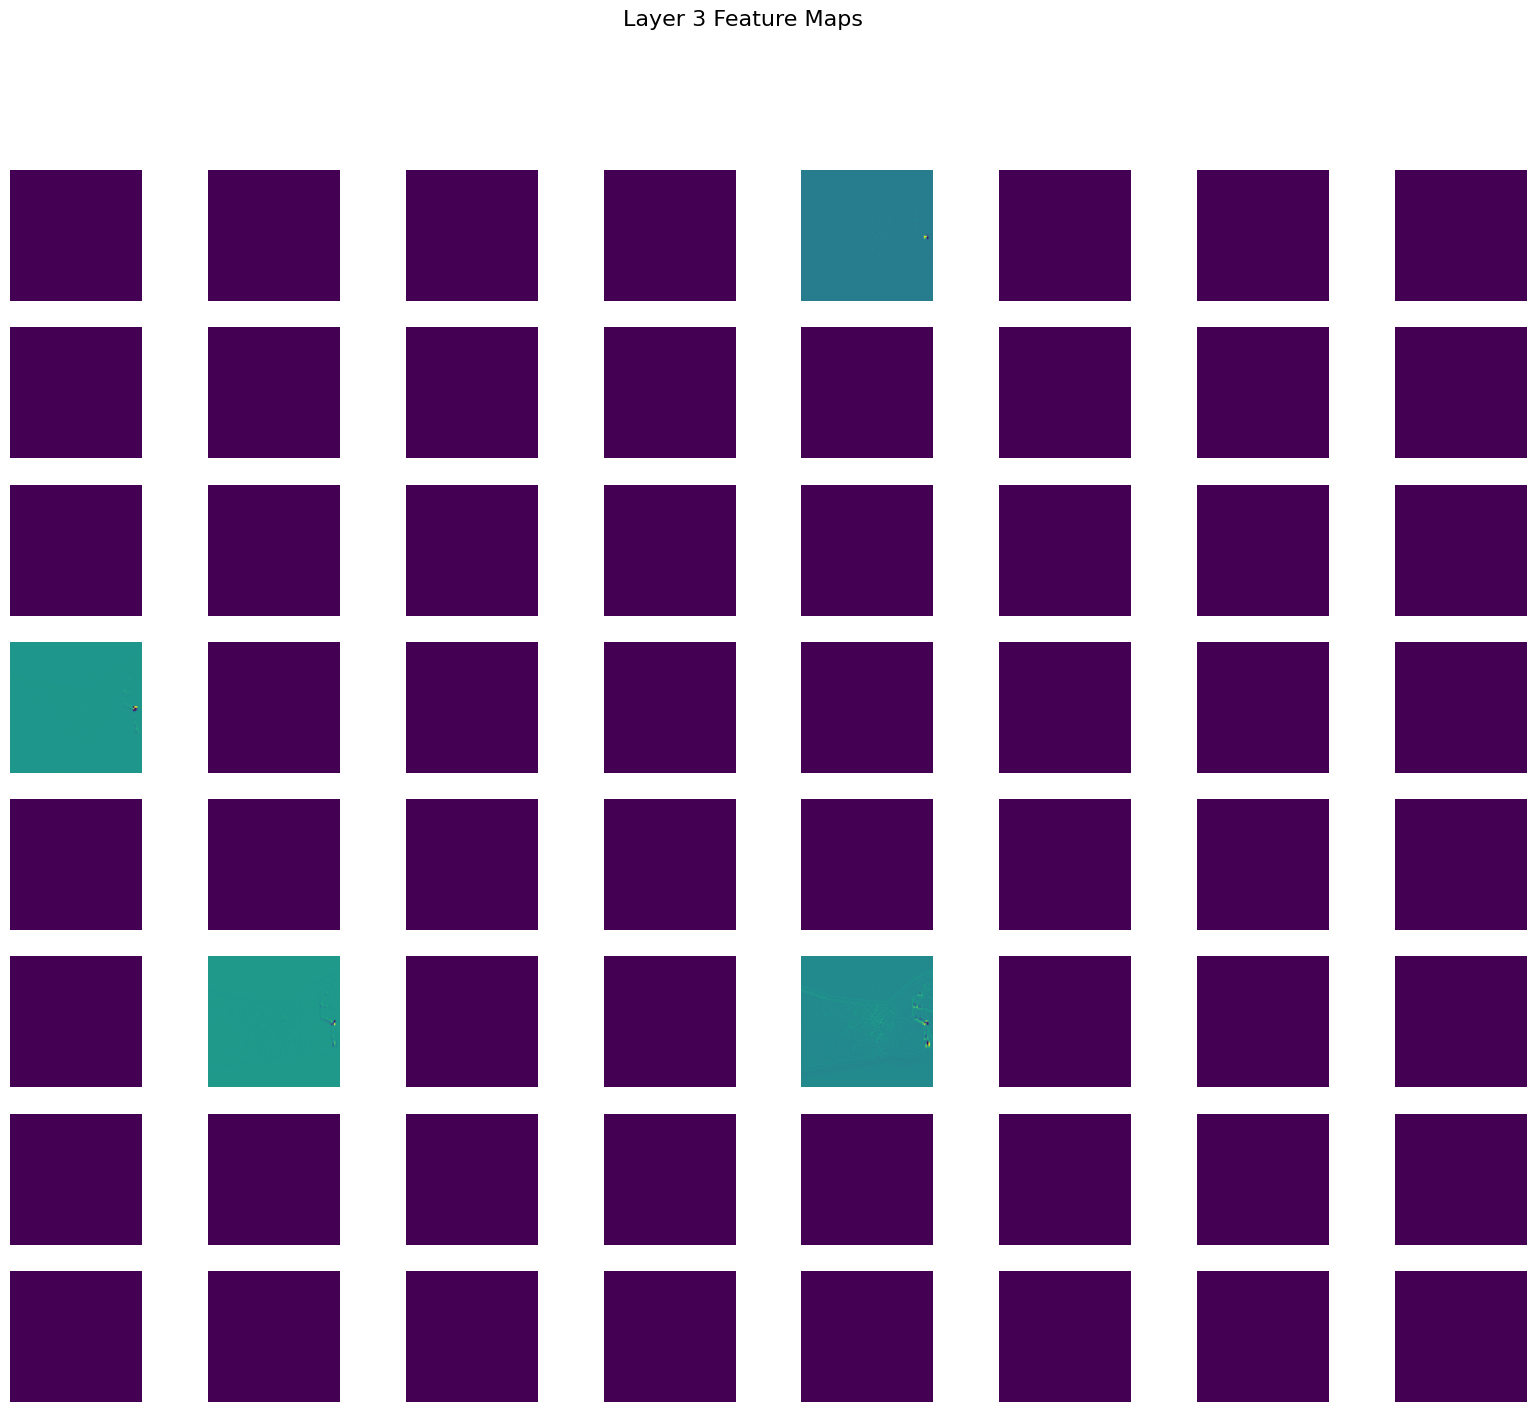

Feature Map from Layer 4 - Shape: (1, 85, 85, 64)


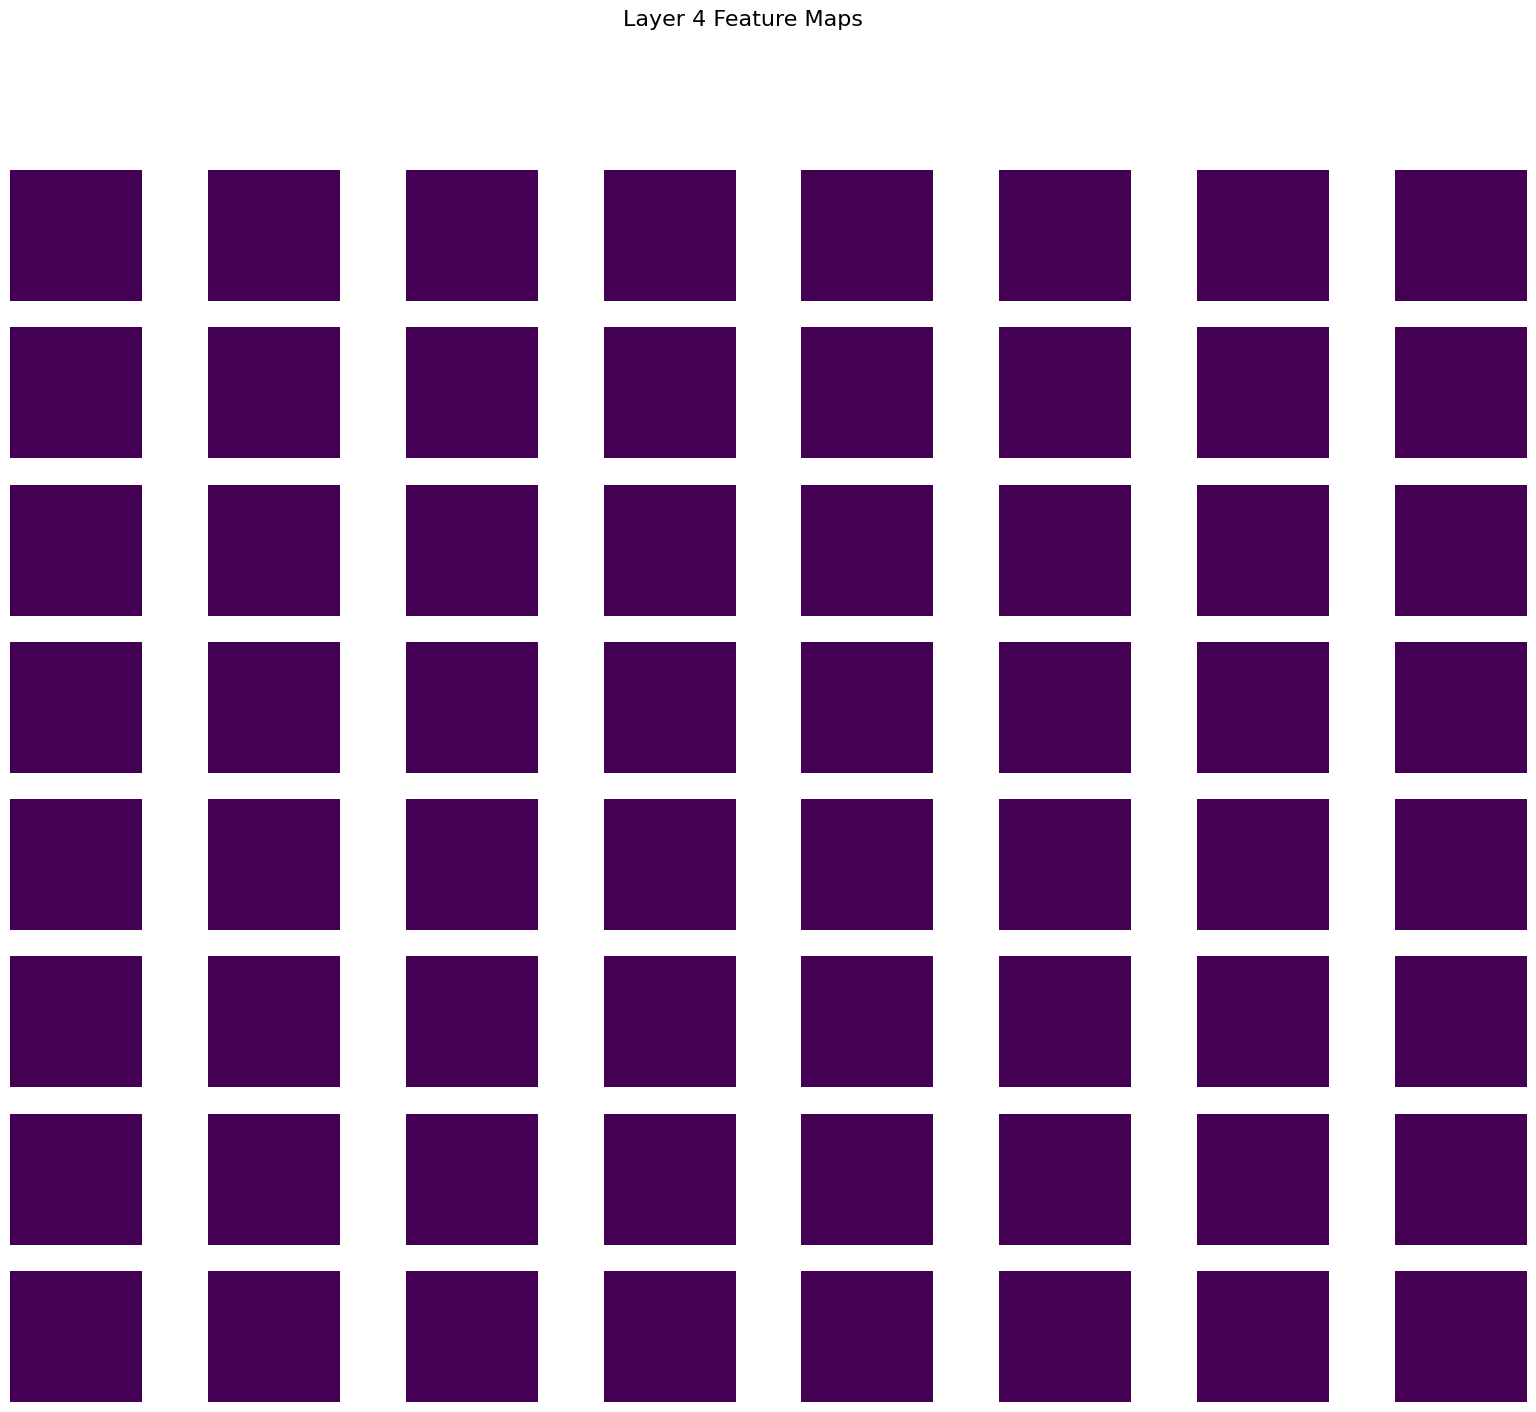

Feature Map from Layer 5 - Shape: (1, 42, 42, 64)


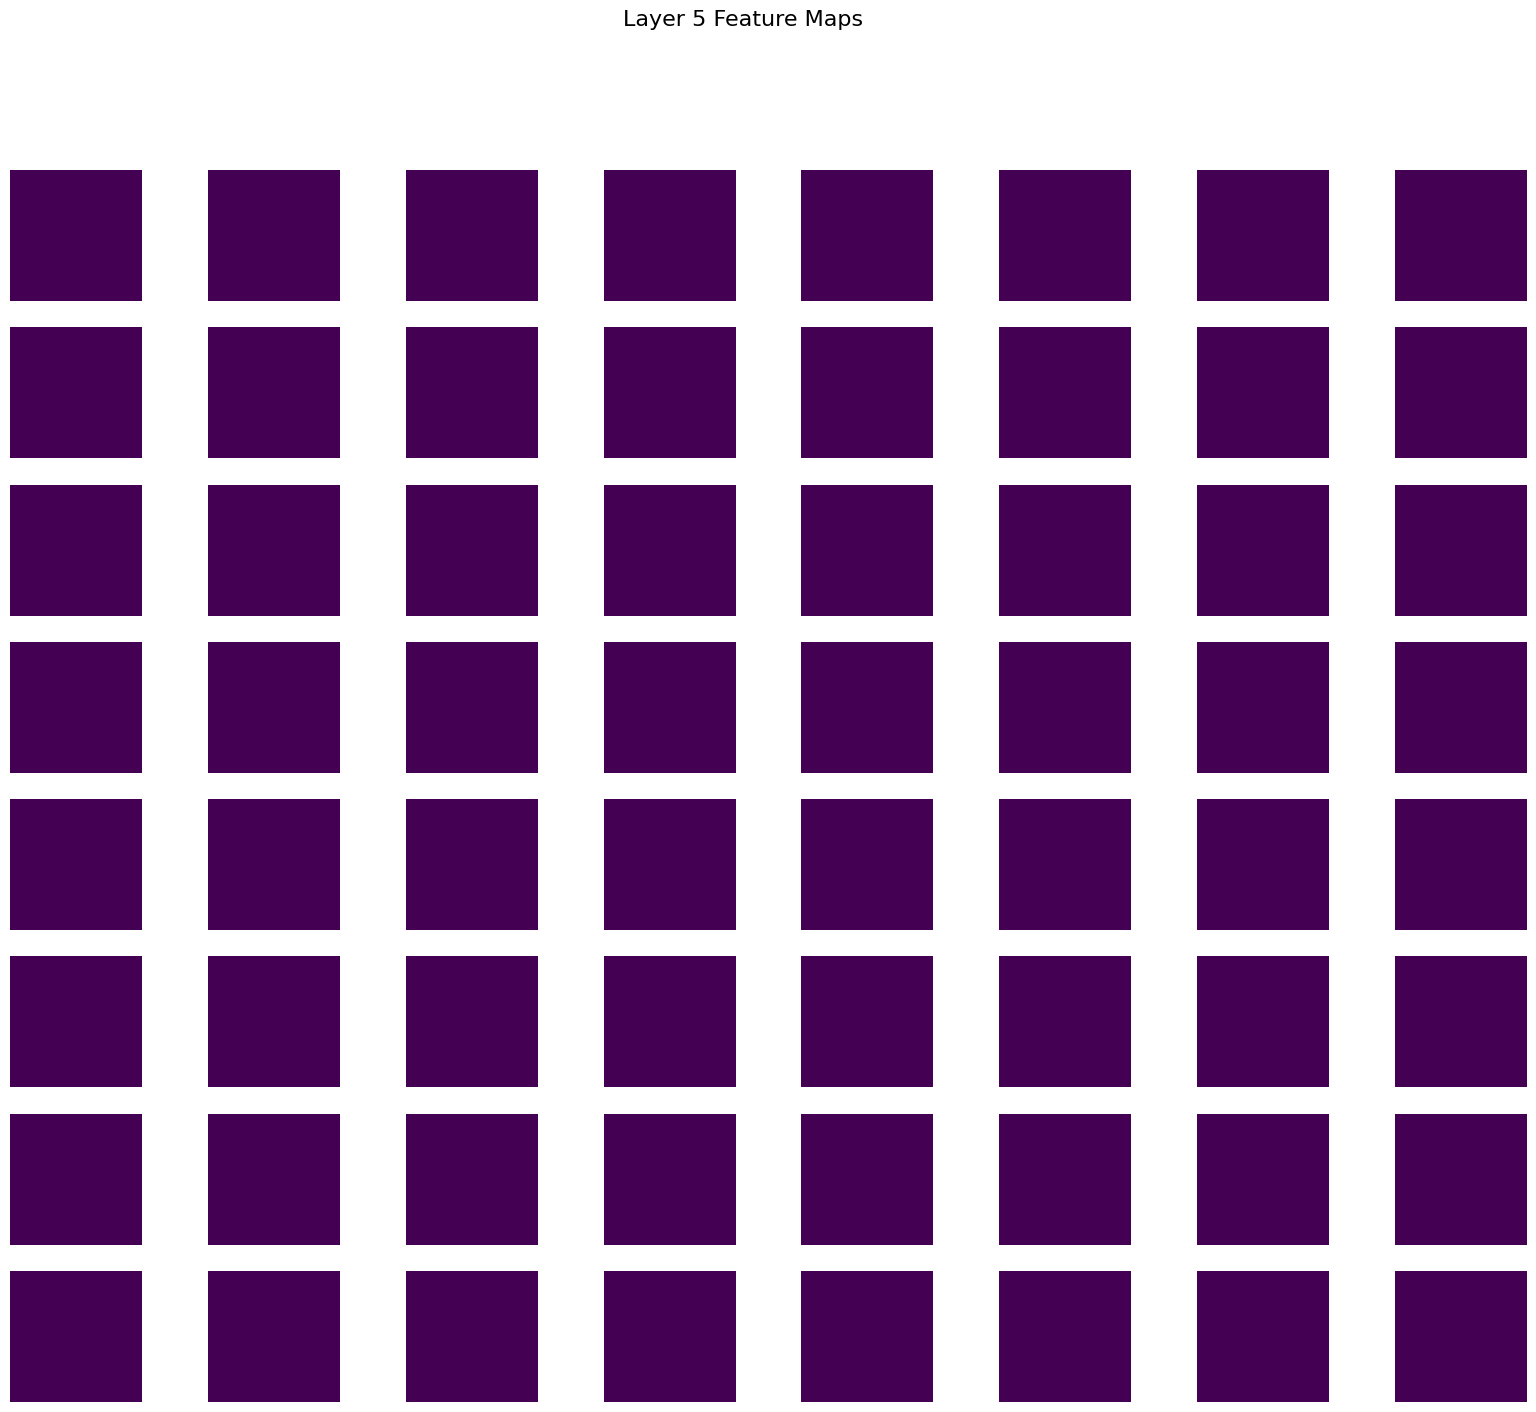

In [11]:
import math
for i, feature_map in enumerate(feature_maps):
    if i==5:
      break
    print(f"Feature Map from Layer {i+1} - Shape: {feature_map.shape}")

    num_filters = feature_map.shape[-1]  # Number of filters in the layer
    # Calculate number of rows needed for 8 columns
    num_rows = math.ceil(num_filters / 8)

    # Create a grid with 8 columns
    fig, axes = plt.subplots(num_rows, 8, figsize=(20, num_rows * 2))

    for j in range(num_filters):
        row = j // 8  # Row index
        col = j % 8   # Column index

        # Plot each feature map (activation from each filter)
        axes[row, col].imshow(feature_map[0, :, :, j], cmap='viridis')  # Use the first image in the batch (index 0)
        axes[row, col].axis('off')  # Remove axes for clarity

    # Hide unused subplots (if any)
    for k in range(num_filters, num_rows * 8):
        axes[k // 8, k % 8].axis('off')

    plt.suptitle(f"Layer {i+1} Feature Maps", fontsize=16)
    plt.show()
